# Introduction to heuristics

In [1]:
from pprint import pprint
import itertools
import static, animated, util, heuristic
import matplotlib.pyplot as plt
import seaborn as sns
import complexity
sns.set_style("whitegrid")

import numpy as np
np.random.seed(7)

## Study cases

### Example 1: Random distribution

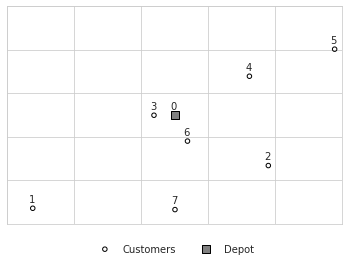

In [2]:
n_customers = 7
figsize = (8, 8)

coords = util.get_random_nodes(n_customers)
nodes = list(range(len(coords)))
depot, customer_nodes = nodes[0], nodes[1:]

static.draw_nodes(coords, nodes)

### Example 2: 48 US capitals

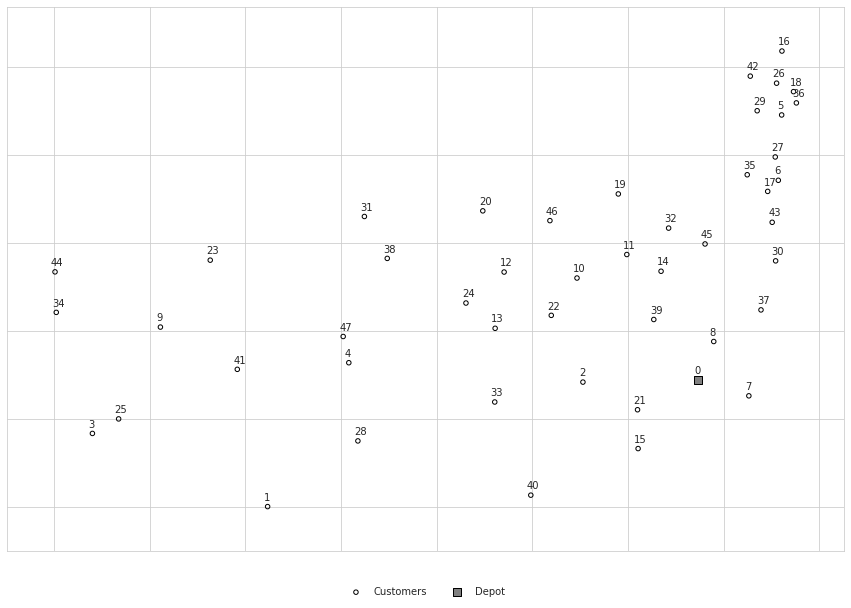

In [3]:
us_nodes, us_coords = static.get_data_us_capitals()
us_depot, us_customer_nodes = us_nodes[0], us_nodes[1:]
us_fig, us_ax = static.get_us_plot()
static.draw_nodes(us_coords, us_nodes, ax=us_ax)

## Traveling salesman problem (TSP)

### Solution approaches

#### Brute force

Check all possible routes (n customers = n! solutions):

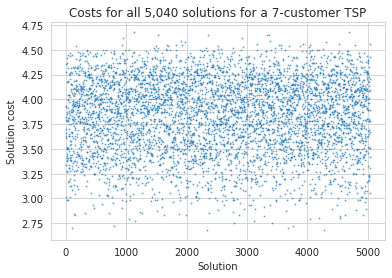

In [4]:
tsp_solutions = heuristic.get_brute_force(customer_nodes, depot=depot)
tsp_sol_costs = [util.get_total_cost(s, coords) for s in tsp_solutions]

plt.scatter(np.arange(len(tsp_solutions)), tsp_sol_costs, s=1, alpha=0.5)
plt.title(f"Costs for all {len(tsp_solutions):,} solutions for a {n_customers}-customer TSP") 
plt.ylabel("Solution cost")
_ = plt.xlabel("Solution")

The best 50 solutions:

In [5]:
tsp_sorted_sol = sorted(tsp_solutions, key=lambda s:util.get_total_cost(s, coords), reverse=True)
animated.show_solutions(tsp_sorted_sol[-50:], coords, nodes)

#### Random

Route: (0, 7, 6, 2, 1, 5, 4, 3, 0)


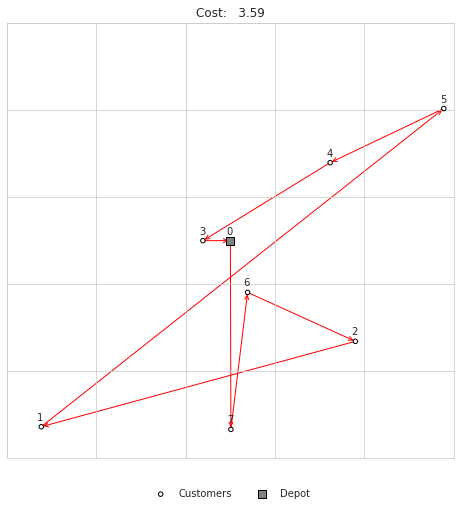

In [6]:
random_route = (0,) + tuple(np.random.permutation(np.arange(n_customers)+1)) +  (0,)
print(f"Route: {random_route}")
static.construct_route(random_route, nodes, coords, figsize=figsize)

#### Construction heuristic

##### Nearest Neighbor
Randomly select a starting node and until no more node is available add the closest node to the last selected node. Finally, connect the last node with the first node.

Starting from: 0 - Route: (0, 3, 6, 2, 7, 1, 4, 5, 0)


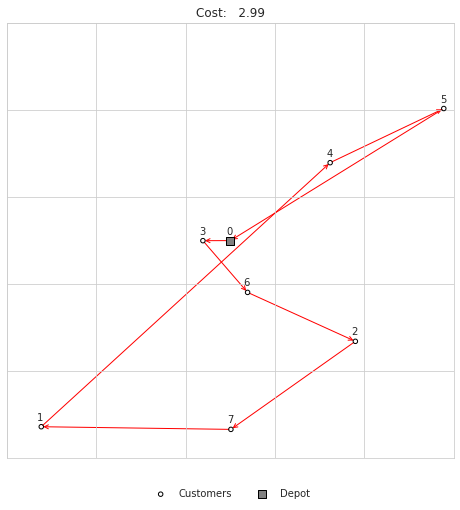

In [7]:
random_start = np.random.randint(len(nodes))
nn_route = heuristic.get_route_nearest_neighborhood(customer_nodes, coords, start=random_start)
print(f"Starting from: {random_start} - Route: {nn_route}")
static.construct_route(nn_route, nodes, coords, figsize=figsize)

In [8]:
animated.construct_route(nn_route, coords, nodes, figsize=figsize)

##### Farthest addition

Starting from: 7 - Route: (0, 6, 2, 4, 5, 7, 1, 3, 0)


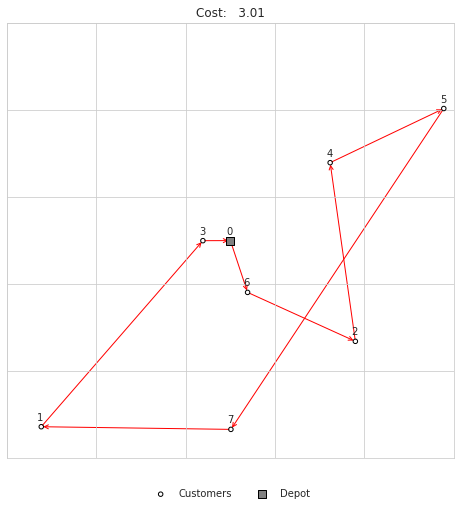

In [9]:
random_start = np.random.randint(len(nodes))
fa_route, sols = heuristic.get_route_farthest_addition(customer_nodes, coords, start=random_start)
print(f"Starting from: {random_start} - Route: {fa_route}")
static.construct_route(fa_route, nodes, coords, figsize=figsize)

Example of farthest insertion algorithm using the US capitals instance (48 nodes):

In [10]:
us_random_start = np.random.randint(len(us_nodes))
print(f"Starting from: {us_random_start}")

fa_us_route, fa_us_sol_steps = heuristic.get_route_farthest_addition(us_customer_nodes, us_coords, start=us_random_start)
print(f"Route: {fa_us_route}")

Starting from: 0
Route: (0, 7, 8, 37, 30, 43, 17, 6, 27, 29, 5, 36, 18, 26, 16, 42, 35, 45, 32, 19, 46, 20, 31, 38, 24, 12, 13, 22, 10, 11, 14, 39, 2, 21, 15, 40, 33, 47, 4, 28, 1, 41, 25, 3, 9, 23, 34, 44, 0)


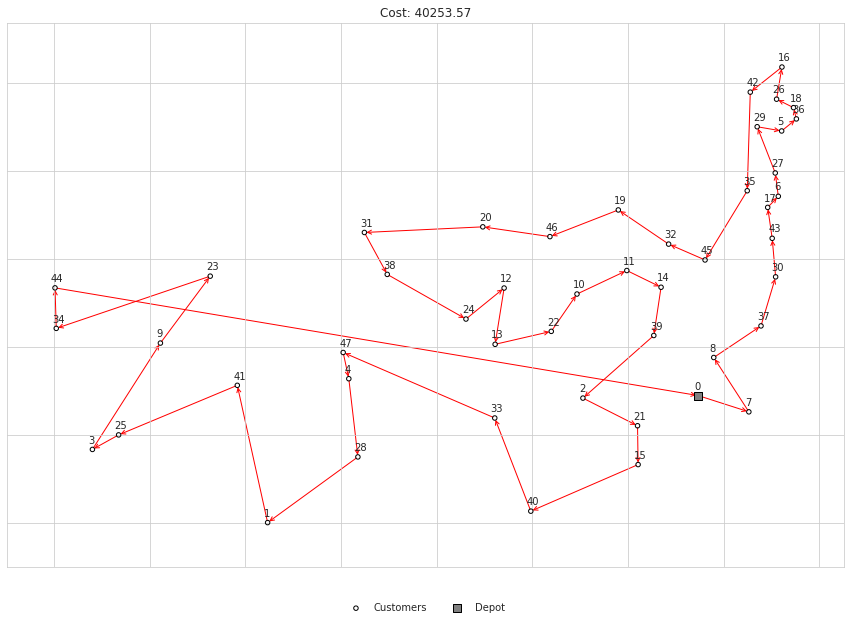

In [11]:
us_fig, us_ax = static.get_us_plot()
static.construct_route(fa_us_route, us_nodes, us_coords, ax=us_ax)

In [12]:
us_fig, us_ax = static.get_us_plot()
animated.show_solutions(fa_us_sol_steps, us_coords, us_nodes, ax=us_ax, fig=us_fig)

#### Local search

#### Metaheuristics

## Vehicle Routing Problem (VRP)

### Complexity

> How many ways can $k$ vehicles pick up $n$ customers?

Let us assume customers 1, 2, 3, and 4 (i.e., $n=4$) must picked picked up by vehicles 1, 2, and 3 (i.e., $k=3$):

| Vehicle 1 | Vehicle 2 | Vehicle 3 | Way                                                                                   | Representation      |
|:---------:|:---------:|:--------: |---------------------------------------------------------------------------------------|---------------------|
| 🧍 🧍 🧍 🧍 |           |           | Customers 1,2,3, and 4 picked up by Vehicle 1                                         | `((1,2,3,4),(),())` |
|   🧍 🧍 🧍 |     🧍     |           | Customers 1,2, and 3 picked up by Vehicle 1 and customer 4 picked up by Vehicle 2     | `((1,2,3),(4),())`  |
|    🧍 🧍   |    🧍 🧍   |           | Customers 1 and 2 picked up by vehicle 1 and customers 3 and 4 picked up by Vehicle 2 | `((1,2),(3,4),())`  |

Using the [stars and bars](https://en.wikipedia.org/wiki/Stars_and_bars_(combinatorics)) method, the solutions presented above could be represented as

- "🧍🧍🧍🧍┃┃",
- "🧍🧍🧍┃🧍┃, and
- "🧍🧍┃🧍🧍┃".

The bars "┃" mark the separation between customers being serviced by different vehicles. Notice that one fewer bar is used since there is no need to service more customers after the last user.

The number of ways to distribute customers to vehicles correspond to the number of ways symbols '🧍🧍🧍🧍┃┃' can be combined.
With 7 symbols, we must choose 2 of them to be customer separators. Thus:

There are ${6 \choose 2} = 15$ ways to distribute $4$ customers to $3$ vehicles (or, alternatively, 15 ways of choosing 2 symbols among 6 to be separators).

The ways are as follows:

In [13]:
n = 4 # n. of customers
k = 3 # n. of vehicles
customers = ['🧍'] * n
separations = ["┃"] * (k - 1) # 3 vehicles = 2 separations
symbols = customers + separations

# Transformation to set exclude duplicate permutations
ways = set(itertools.permutations(symbols))


print(f"k={4} vehicles can pick up n={n} customers in {len(ways)} different ways.\n")
print("# Ways (vehicles are separated by '|'):")
complexity.enumerate_ways(ways)

k=4 vehicles can pick up n=4 customers in 15 different ways.

# Ways (vehicles are separated by '|'):
  1  ┃┃🧍🧍🧍🧍
  2  ┃🧍┃🧍🧍🧍
  3  ┃🧍🧍┃🧍🧍
  4  ┃🧍🧍🧍┃🧍
  5  ┃🧍🧍🧍🧍┃
  6  🧍┃┃🧍🧍🧍
  7  🧍┃🧍┃🧍🧍
  8  🧍┃🧍🧍┃🧍
  9  🧍┃🧍🧍🧍┃
 10  🧍🧍┃┃🧍🧍
 11  🧍🧍┃🧍┃🧍
 12  🧍🧍┃🧍🧍┃
 13  🧍🧍🧍┃┃🧍
 14  🧍🧍🧍┃🧍┃
 15  🧍🧍🧍🧍┃┃


The number of ways is given by the formula:

$${n + k - 1 \choose k - 1} = \frac{(n + k - 1)!}{(k-1)!(n+k-1-(k-1)!} = \frac{(n + k - 1)!}{(k-1)!n!,}$$

which can be applied using the `math.comb` function:

In [14]:
import math
n_ways = math.comb(n+k-1,k-1)
print(f"k={k} vehicles can pick up n={n} customers in {n_ways} different ways.\n")

k=3 vehicles can pick up n=4 customers in 15 different ways.



Knowing how many ways customers can be assigned to vehicles, we can also calculate the total number of possible assignments, that is:

> In how many ways $k$ vehicles can pick up $n$ customers?

Similarly to the TSP (a one-vehicle VRP) $n$ customers can be visited in $n!$ ways.
Each possible customer permutation can be further divided into ${n + k - 1 \choose k - 1}$ ways using the '┃' separators.

For example, the sequence of visits `(1,2,3,4)` can be split among 3 vehicles as follows:

In [15]:
ways_1234 = complexity.get_ways_to_split_list_in_kbins((1,2,3,4), 3)
complexity.enumerate_ways(ways_1234)

  1  1234┃┃
  2  123┃4┃
  3  123┃┃4
  4  12┃34┃
  5  12┃3┃4
  6  12┃┃34
  7  1┃234┃
  8  1┃23┃4
  9  1┃2┃34
 10  1┃┃234
 11  ┃1234┃
 12  ┃123┃4
 13  ┃12┃34
 14  ┃1┃234
 15  ┃┃1234


Therefore, $k=3$ vehicles can pickup $n=4$ customers in $4!{6 \choose 2} =  12 \times 15 = 360$ ways.

the total number of schedules is given by the formula:

$$n!{n + k - 1 \choose k - 1} = n! \frac{(n + k - 1)!}{(k-1)!n!} = \frac{(n + k - 1)!}{(k-1)!}$$    

#### Sulution space


Below, the solution space (total number of possible schedules) for different combinations of n. of customers and n. of vehicles:

In [16]:
import pandas as pd
from scipy.special import comb
from decimal import Decimal

k_list = [3, 5, 10]
n_list = [5, 10, 30, 50, 100]
nk_dict = []
for n,k in itertools.product(n_list, k_list):
    nk_schedules = math.factorial(n+k-1)/math.factorial(k-1)
    if nk_schedules < 10**12: # Show zeros for "smaller" values
        nk_dict.append((n, k, f"{int(nk_schedules):,}"))
    else: # Show scientific notation
        nk_dict.append((n, k, f"{Decimal(nk_schedules):.2E}"))

pd.DataFrame(nk_dict, columns=["n. of customers", "n. of vehicles", "n. of schedules"]).set_index(["n. of customers", "n. of vehicles"])

n. of schedules
n. of customers n. of vehicles                 
5               3                         2,520
                5                        15,120
                10                      240,240
10              3                   239,500,800
                5                 3,632,428,800
                10              335,221,286,400
30              3                      1.32E+35
                5                      1.23E+37
                10                     5.62E+40
50              3                      4.03E+67
                5                      9.62E+69
                10                     3.82E+74
100             3                     4.81E+161
                5                     4.29E+164
                10                    3.98E+170

Typically, exact algorithms can solve to optimality relatively small instances involving around 100 customers.

#### Questions

- How the solution space changes if *time window* and *capacity* constraints are considered (i.e., CVRP, VRPTW)?
- How the solution space changes if we consider customer *pickups and deliveries* (i.e., VRPPD)?

### Solution approaches

#### Brute force

In [17]:
n_vehicles = 3
n_customers = 4
coords = util.get_random_nodes(n_customers)
nodes = list(range(len(coords)))
depot, customer_nodes = nodes[0], nodes[1:]

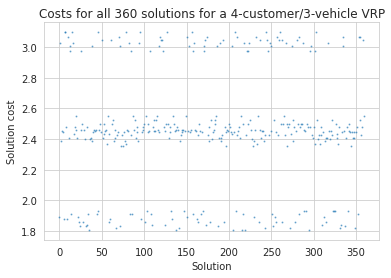

In [18]:
vrp_solutions = heuristic.get_brute_force(customer_nodes, depot=depot, n_vehicles=n_vehicles)
vrp_sol_costs = [util.get_total_cost(s, coords) for s in vrp_solutions]

plt.scatter(np.arange(len(vrp_sol_costs)), vrp_sol_costs, s=1, alpha=0.5)
plt.title(f"Costs for all {len(vrp_solutions):,} solutions for a {n_customers}-customer/{n_vehicles}-vehicle VRP") 
plt.ylabel("Solution cost")

_ = plt.xlabel("Solution")

The sulutions assume vehicles are *distinguishable*, for example, if $k=3$ and $n=4$, the following routes are different:
- `((), (0, 1, 0), (0, 2, 3, 4, 0))`,
- `((), (0, 2, 3, 4, 0), (0, 1, 0))`,
- `((0, 1, 0), (0, 2, 3, 4, 0), ())`,
- `((0, 1, 0), (), (0, 2, 3, 4, 0))`,
- `((0, 2, 3, 4, 0), (), (0, 1, 0))`, and
- `((0, 2, 3, 4, 0), (0, 1, 0), ())`.

Format: (`route_V1`, `route_V2`, `route_V3`).

If vehicles are *undistinguishable* we have:

In [19]:
vrp_solutions_undistinguishable = heuristic.get_brute_force(
    customer_nodes,
    depot=depot,
    n_vehicles=n_vehicles,
    distinguish_vehicles=False)

print(f"{n_customers}-customer/{n_vehicles}-vehicle "
      f"VRP solutions (undistinguishable vehicles) = "
      f"{len(vrp_solutions_undistinguishable):,}")

4-customer/3-vehicle VRP solutions (undistinguishable vehicles) = 72


In [20]:
vrp_sorted_sol = sorted(
    vrp_solutions_undistinguishable,
    key=lambda s:util.get_total_cost(s, coords),
    reverse=True)

animated.show_solutions(vrp_sorted_sol[-100:], coords, nodes)

#### Local search

#### Metaheuristic

## Read more

- [Levin, Oscar. Discrete mathematics: An Open Intruduction (Chapter 1.5 Stars and Bars)](http://discrete.openmathbooks.org/dmoi2/sec_stars-and-bars.html).